In [170]:
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression**

In [238]:
np.random.seed(1)
n_features = 1
x = np.random.randn(1000, n_features)
w = np.random.rand(x.shape[1], 1)
b = np.random.randn()
# w = w.reshape(-1, 1)
y = np.dot(x, w) + b + (np.random.randn(1000, 1) * 0.3)
print(x.shape, y.shape)

(1000, 1) (1000, 1)


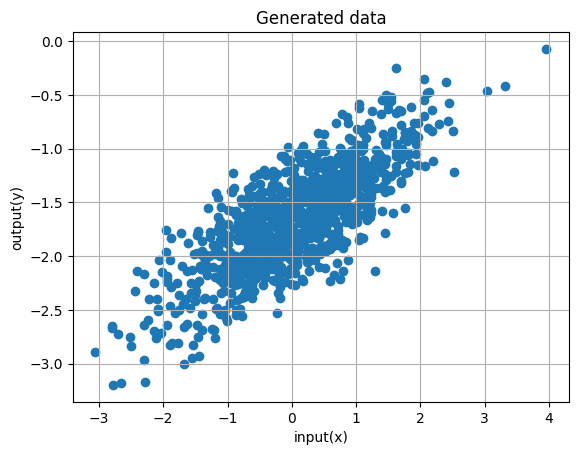

In [239]:
if n_features == 1:
    plt.title("Generated data")
    plt.xlabel("input(x)")
    plt.ylabel("output(y)")
    plt.scatter(x=x[:, 0], y=y[:, 0])
    plt.grid(True)
    plt.show()

In [240]:
class SimpleLinearRegression:
    def __init__(self, regtype=None):

        self.reg = 1  # l2-norm
        self.regtype = regtype

    def predict(self, X):
        return np.dot(X, self.m) + self.b

    def get_cost(self, y_pred, y_true):
        cost = (np.sum(np.square(y_pred - y_true))) / (self.size)

        if self.regtype == "l2":
            return cost + np.sum((self.reg * np.sum(self.m**2))) / (2 * self.size)

        if self.regtype == "l1":
            return cost + np.sum((self.reg * np.abs(self.m))) / (2 * self.size)
        return cost

    def fit(self, X, y, learning_rate=0.01, iterations=1000):

        self.size = y.shape[0]
        self.b = 0

        cost = []
        self.m = np.ones((X.shape[1], 1))

        for i in range(iterations):
            y_pred = self.predict(X)
            cost.append(self.get_cost(y_pred, y))
            dm = np.dot(X.T, (y_pred - y)) / self.size
            if self.regtype == "l2":
                dm += (self.reg * self.m) / self.size

            if self.regtype == "l1":
                dm += (
                    self.reg * np.sign(self.m)
                ) / self.size  # np.sign -1 for negative values, 0 for zero, and 1 for positive values.

            db = np.sum(y_pred - y) / self.size

            self.m = self.m - (learning_rate * dm)
            self.b = self.b - (learning_rate * db)

            y_pred = self.predict(X)
            cost.append(self.get_cost(y_pred, y))
            if (i + 1) % 100 == 0:
                print("Cost at iteration number " + str(i + 1) + " is : ", cost[i])
        plt.title("cost v/s iteration")
        plt.plot(cost)
        plt.xlabel("no. of iterations")
        plt.ylabel("cost")
        plt.show()

Cost at iteration number 100 is :  1.259168420321378
Cost at iteration number 200 is :  0.5090638156949053
Cost at iteration number 300 is :  0.24030985138157054
Cost at iteration number 400 is :  0.1439887023588262
Cost at iteration number 500 is :  0.1094563637263075
Cost at iteration number 600 is :  0.09707216962531345
Cost at iteration number 700 is :  0.09262954061405783
Cost at iteration number 800 is :  0.09103540638946397
Cost at iteration number 900 is :  0.0904632874609502
Cost at iteration number 1000 is :  0.0902579539449021


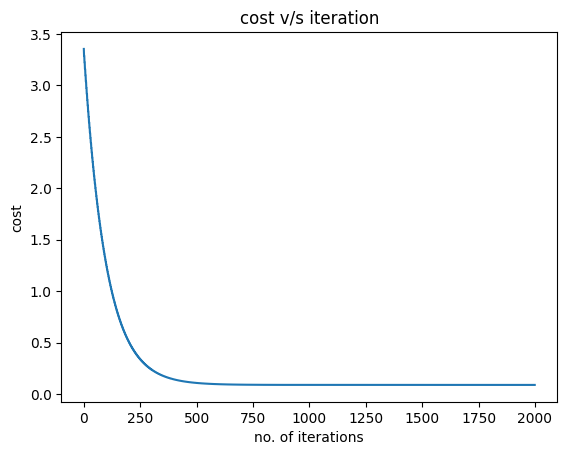

In [241]:
model = SimpleLinearRegression(regtype="l2")
model.fit(x, y)

In [242]:
y_pred = model.predict(x)

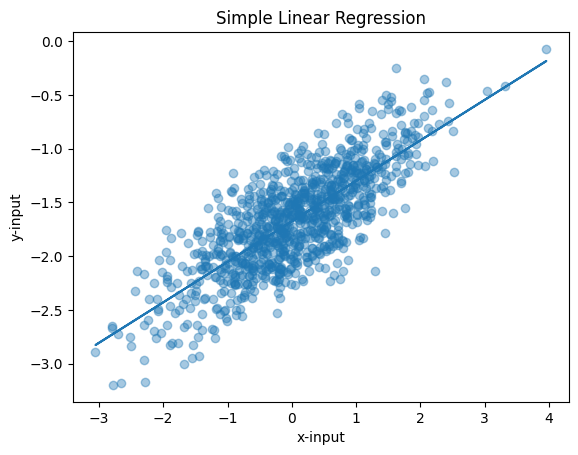

In [243]:
if n_features == 1:
    plt.title("Simple Linear Regression")
    plt.scatter(x=x[:, 0], y=y[:, 0], alpha=0.4)
    plt.plot(x[:, 0], y_pred[:, 0])
    plt.xlabel("x-input")
    plt.ylabel("y-input")
    plt.show()

**Logistic Regression**

In [268]:
from sklearn.datasets import make_classification

x, y = make_classification(random_state=1, n_features=5, n_classes=2, n_samples=1000)
print(x.shape, y.shape)

(1000, 5) (1000,)


In [269]:
class SimpleLogisticRegression:
    def __init__(self, regtype=None):
        self.m = np.random.rand()
        self.b = np.random.rand()
        self.reg = 1  # l2-norm
        self.regtype = regtype

    def predict(self, X):
        z = np.dot(X, self.m) + self.b
        y_pred = self._sigmoid(z)
        return y_pred

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def get_cost(self, y_pred, y_true):
        cost = (-1 / self.size) * np.sum(
            y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
        )

        if self.regtype == "l2":
            return cost + np.sum((self.reg * np.sum(self.m**2))) / (2 * self.size)

        if self.regtype == "l1":
            return cost + np.sum((self.reg * np.abs(self.m))) / (2 * self.size)
        return cost

    def fit(self, X, y, learning_rate=0.01, iterations=100):
        self.size = y.shape[0]
        self.b = 0

        cost = []
        self.m = np.ones((X.shape[1], 1))

        for i in range(iterations):
            y_pred = self.predict(X)
            # print(y.shape, y_pred.shape)
            cost.append(self.get_cost(y_pred, y))
            dm = (
                np.dot(X.T, (y_pred - y_pred)) / self.size
            )  # np.sum((y_pred - y) * X) / self.size
            if self.regtype == "l2":
                dm += np.sum(self.reg * self.m) / self.size

            if self.regtype == "l1":
                dm += (
                    np.sum(self.reg * np.sign(self.m)) / self.size
                )  # np.sign -1 for negative values, 0 for zero, and 1 for positive values.

            db = np.sum(y_pred - y) / self.size

            self.m = self.m - (learning_rate * dm)
            self.b = self.b - (learning_rate * db)

            y_pred = self.predict(X)
            cost.append(self.get_cost(y_pred, y))
            if (i + 1) % 25 == 0:
                print("Cost at iteration number " + str(i + 1) + " is : ", cost[i])
        plt.title("cost v/s iteration")
        plt.plot(cost)
        plt.xlabel("no. of iterations")
        plt.ylabel("cost")
        plt.show()

Cost at iteration number 25 is :  1384.2005838806833
Cost at iteration number 50 is :  1383.5293489895178
Cost at iteration number 75 is :  1382.910234790633
Cost at iteration number 100 is :  1382.2400552596723


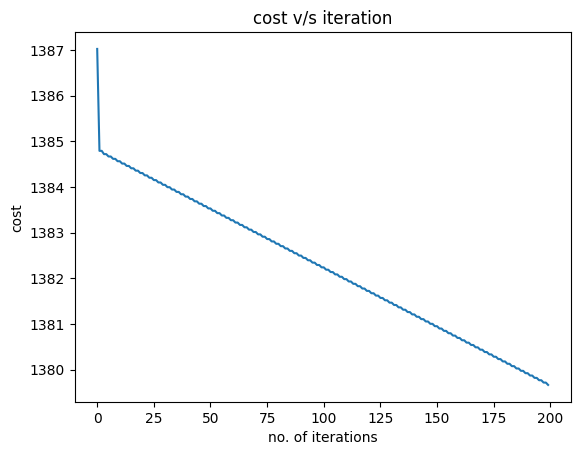

In [270]:
model = SimpleLogisticRegression(regtype="l2")
model.fit(x, y)

In [271]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

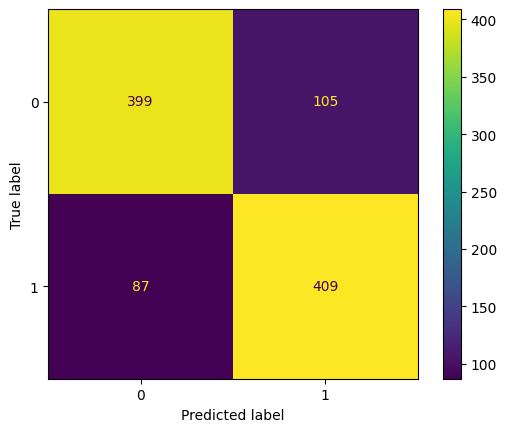

In [272]:
predictions = model.predict(x)
y_pred = np.round(predictions).astype(int)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

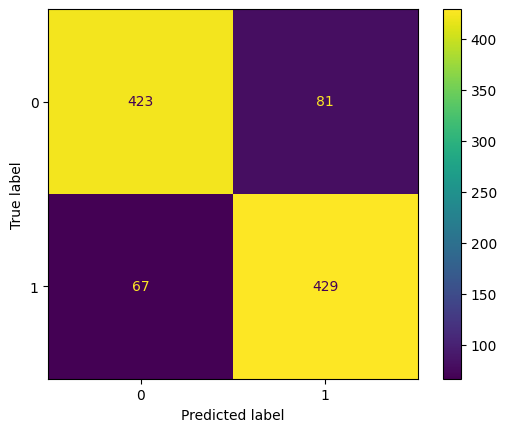

In [267]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x, y)
y_pred = clf.predict(x)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

**KNN**

In [281]:
from collections import Counter
import numpy as np


class KNN:
    def __init__(self, k=3, distance="euclidean"):
        self.k = k
        self.distance = distance

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Compute distances between the test point and all training points
            if self.distance == "euclidean":
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance == "manhattan":
                distances = np.sum(np.abs(self.X_train - x), axis=1)

            # Select the k nearest neighbors
            nearest_indices = np.argsort(distances)[: self.k]
            nearest_labels = self.y_train[nearest_indices]

            # Assign the class label that appears most frequently among the k nearest neighbors
            label = Counter(nearest_labels).most_common(1)[0][0]
            y_pred.append(label)

        return np.array(y_pred)

In [282]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance="euclidean")

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


**Kmeans**

In [ ]:
import numpy as np


class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]

        for i in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            cluster_assignments = []
            for j in range(len(X)):
                distances = np.linalg.norm(X[j] - self.centroids, axis=1)
                cluster_assignments.append(np.argmin(distances))

            # Update centroids
            for k in range(self.k):
                cluster_data_points = X[np.where(np.array(cluster_assignments) == k)]
                if len(cluster_data_points) > 0:
                    self.centroids[k] = np.mean(cluster_data_points, axis=0)

            # Check for convergence
            if i > 0 and np.array_equal(self.centroids, previous_centroids):
                break

            # Update previous centroids
            previous_centroids = np.copy(self.centroids)

        # Store the final cluster assignments
        self.cluster_assignments = cluster_assignments

    def predict(self, X):
        # Assign each data point to the nearest centroid
        cluster_assignments = []
        for j in range(len(X)):
            distances = np.linalg.norm(X[j] - self.centroids, axis=1)
            cluster_assignments.append(np.argmin(distances))

        return cluster_assignments

In [274]:
import numpy as np


class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[
            np.random.choice(X.shape[0], self.k, replace=False)
        ]  # k*feature

        # Iterate until convergence or maximum number of iterations is reached
        for i in range(self.max_iters):
            # Assign each data point to the closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)  # n*k
            cluster_assignments = np.argmin(distances, axis=1)  #

            # Update the centroids based on the new cluster assignments
            new_centroids = np.array(
                [
                    np.mean(X[np.where(cluster_assignments == j)], axis=0)
                    for j in range(self.k)
                ]
            )

            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        return cluster_assignments

In [278]:
x1 = np.random.randn(5, 2) + 5
x2 = np.random.randn(5, 2) - 5
X = np.concatenate([x1, x2], axis=0)
print(X.shape)

(10, 2)


In [276]:
# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[1 1 1 1 1 0 0 0 0 0]
[[-5.03154127 -5.08265061]
 [ 4.43217975  5.22707232]]


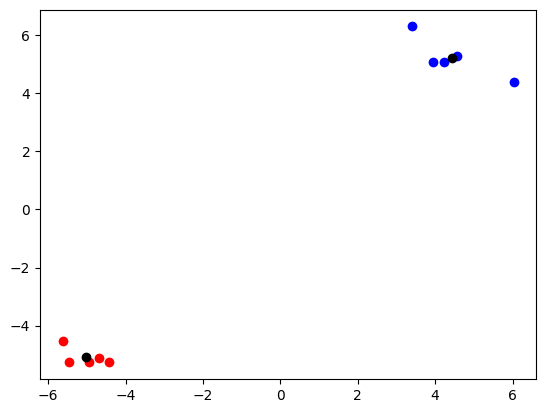

In [277]:
from matplotlib import pyplot as plt

# Plot the data points with different colors based on their cluster assignments
colors = ["r", "b"]
for i in range(kmeans.k):
    plt.scatter(
        X[np.where(np.array(cluster_assignments) == i)][:, 0],
        X[np.where(np.array(cluster_assignments) == i)][:, 1],
        color=colors[i],
    )

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color="black", marker="o")

# Show the plot
plt.show()